In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Fetch PES Points 

In [7]:
path = "../TaskC/pes.tab"

r = []
E_HF = []
E_CCSDT = []

with open(path, "r") as f:
    for line in f:
        try:
            splits = list(map(float, line.split()))

            r.append(splits[0])
            E_HF.append(splits[1])
            E_CCSDT.append(splits[2])
        except:
            pass
        
#r = np.asarray(r)
E_HF = np.asarray(E_HF)
E_CCSDT = np.asarray(E_CCSDT)

### Convert energies to SI: Hartree -> Joule 

In [22]:
from scipy.constants import physical_constants

conversion_hartree_to_joule = physical_constants["Hartree energy"][0]

E_HF *= conversion_hartree_to_joule
E_CCSDT *= conversion_hartree_to_joule

# PChip Interpolation 

In [9]:
from scipy.interpolate import PchipInterpolator as PChip

interpolator_HF = PChip(r, E_HF)
interpolator_CCSDT = PChip(r, E_CCSDT)

# Display PES 

## Data 

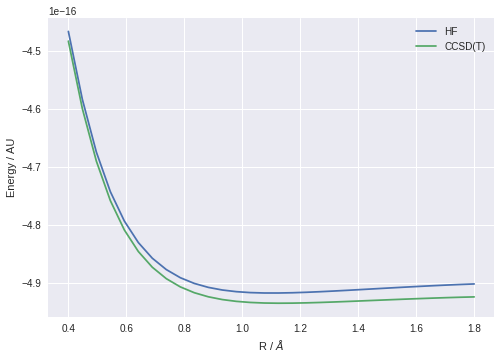

In [10]:
plt.plot(r, E_HF, label="HF")
plt.plot(r, E_CCSDT, label="CCSD(T)")

plt.xlabel("R / $\AA$")
plt.ylabel("Energy / AU")

plt.legend()

## Interpolated 

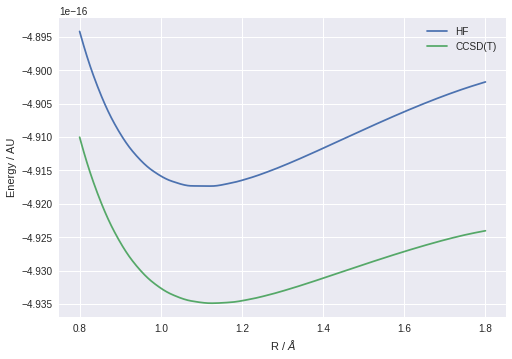

In [11]:
t = np.linspace(0.8, 1.8, 500)

plt.plot(t, interpolator_HF(t), label="HF")
plt.plot(t, interpolator_CCSDT(t), label="CCSD(T)")

plt.xlabel("R / $\AA$")
plt.ylabel("Energy / AU")

plt.legend()

# Make Hamiltonian 

In [12]:
# dimensio of hamiltonian
N = 1000

In [13]:
from scipy.constants import physical_constants

u = physical_constants["atomic mass constant"][0]

m_C = 12 * u
m_O = 16 * u

## Kinetic Term

In [14]:
from scipy.constants import hbar
from scipy.sparse import diags

mu = m_C * m_O / (m_C + m_O)

P = hbar**2 / (2 * mu) * (
    diags(2 * np.ones(N)) + \
    diags(-1 * np.ones(N-1), -1) + \
    diags(-1 * np.ones(N-1), +1)
)
    

## Potential Term 

In [15]:
r = np.linspace(0.8, 1.8, N)

U_HF = diags(interpolator_HF(r))
U_CCSDT = diags(interpolator_CCSDT(r))

## H = P + U 

In [16]:
H_HF = P + U_HF
H_CCSDT = P + U_CCSDT

#  Solve Finite Differences Equations


Eigenvalueproblem: $\hat{H} |\psi\rangle = E |\psi\rangle$

Finite differences: $\psi = \{\psi_1, \psi_2, \ldots, \psi_n\}$

In [58]:
# numer of eigen values 
n = 30

In [59]:
from scipy.constants import physical_constants
conversion_joule_to_eV = 1 / physical_constants["electron volt"][0]

## HF 

In [60]:
from scipy.sparse.linalg import eigsh

E, psi = eigsh(H_HF, n)

In [61]:
print(E * conversion_joule_to_eV)

[-3069.16632673 -3069.16632522 -3069.16630414 -3069.16626446
 -3069.16620776 -3069.16613413 -3069.16604364 -3069.1660422
 -3069.16593638 -3069.16581242 -3069.16567185 -3069.16551476
 -3069.16535528 -3069.16534122 -3069.16515131 -3069.16494511
 -3069.16472271 -3069.16448419 -3069.16427536 -3069.16422962
 -3069.1639591  -3069.1636727  -3069.16337049 -3069.16305258
 -3069.16281334 -3069.16271902 -3069.16236991 -3069.16200533
 -3069.16162536 -3069.16123008]


In [62]:
print(np.diff(E) * conversion_joule_to_eV)

[1.51160070e-06 2.10722688e-05 3.96822649e-05 5.66993365e-05
 7.36351255e-05 9.04896841e-05 1.43770299e-06 1.05825230e-04
 1.23954878e-04 1.40565567e-04 1.57094969e-04 1.59479861e-04
 1.40632067e-05 1.89909924e-04 2.06195448e-04 2.22399734e-04
 2.38522697e-04 2.08829544e-04 4.57348765e-05 2.70524849e-04
 2.86403966e-04 3.02201809e-04 3.17918392e-04 2.39232597e-04
 9.43210963e-05 3.49107692e-04 3.64580433e-04 3.79971848e-04
 3.95282015e-04]


## CCSD(T) 

In [63]:
E, psi = eigsh(H_CCSDT, n)

In [64]:
print(E * conversion_joule_to_eV)

[-3080.12133525 -3080.12126175 -3080.12124985 -3080.12108278
 -3080.12090661 -3080.12080046 -3080.12041688 -3080.12030833
 -3080.11993415 -3080.1194605  -3080.11935439 -3080.11867969
 -3080.11836865 -3080.11791216 -3080.11705391 -3080.11703829
 -3080.11610705 -3080.11547494 -3080.11507367 -3080.11395589
 -3080.11368409 -3080.11275581 -3080.11167128 -3080.11147555
 -3080.11011719 -3080.109442   -3080.10868286 -3080.10717465
 -3080.10700179 -3080.10559468]


In [65]:
print(np.diff(E) * conversion_joule_to_eV)

[7.35015589e-05 1.18998575e-05 1.67066564e-04 1.76167855e-04
 1.06157340e-04 3.83577860e-04 1.08550546e-04 3.74173871e-04
 4.73649908e-04 1.06114944e-04 6.74699196e-04 3.11034444e-04
 4.56492976e-04 8.58249563e-04 1.56175677e-05 9.31247979e-04
 6.32110341e-04 4.01265132e-04 1.11777927e-03 2.71798867e-04
 9.28278104e-04 1.08453687e-03 1.95731674e-04 1.35835403e-03
 6.75187700e-04 7.59145700e-04 1.50820668e-03 1.72866202e-04
 1.40710764e-03]


# Plot energy levels 

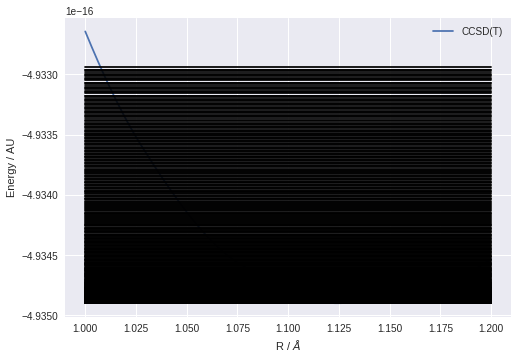

In [57]:
t = np.linspace(1.0, 1.2, 500)

plt.plot(t, interpolator_CCSDT(t), label="CCSD(T)")
for e in  eigsh(H_CCSDT, 300)[0]:
    plt.plot([1.0, 1.2], [e,e], "k-")


plt.xlabel("R / $\AA$")
plt.ylabel("Energy / AU")

plt.legend()